# Probabilistic Principle Component Analysis (PCA)

In the nonprobabilistic PCA, there is an underlying assumption that the data follow the normal distribution, otherwise, the method of maximizing variance is rootless. One problem for nonprobabilistic PCA is no probability accessible. To develop a probabilistic PCA is thus worthwhile. 

In the nonprobabilistic PCA, we project data into principle-component subspace. In probalilistic PCA it is more natural to explicitly define a latent M-dimensional variable $\boldsymbol{z}$ first, $p(\boldsymbol{z}) = \mathscr{N}(\boldsymbol{z}|\boldsymbol{0}, I)$. Then a linear transformation is applied on $\boldsymbol{z}$, giving a conditional distribution of the observed variable $\boldsymbol{x}$, $p(\boldsymbol{x}|\boldsymbol{z}) = \mathscr{N}(\boldsymbol{x}|W\boldsymbol{z} + \boldsymbol{\mu}, \sigma^2I)$, where $W$ is a D by M matrix. Equivalently we could have:

$$
\boldsymbol{x} = W\boldsymbol{z} + \boldsymbol{\mu} + \epsilon
$$

where $\epsilon$ is a zero-mean normal disbrition with covariance $\sigma^2I$. It is easy to get:

___________

$$
p(\boldsymbol{x}) = \mathscr{N}(\boldsymbol{x}|\boldsymbol{\mu}, C), \ \ C = WW^T + \sigma^2I
$$

$$
p(\boldsymbol{z}|\boldsymbol{x}) = \mathscr{N}(\boldsymbol{z}|M^{-1}W^T(\boldsymbol{x}-\boldsymbol{\mu}), \sigma^{-2}M)
, \ \ M = W^TW + \sigma^2I
$$

___________
**The above two equations are the keys.**

If we determine $W$ and $\sigma^2$, then with $p(\boldsymbol{z}_{N+1}|\boldsymbol{x}_{N+1})$, we could easily estimate $\boldsymbol{z}_{N+1}$ from $\boldsymbol{x}_{N+1}$. Then we reduce a D dimensional variable to M dimensional variable. 

There are two ways to determine $W$ and $\sigma^2$: **maximize likelihood** and **EM algorithm**.

One more note: there are some redundant parameters in $W$. If we replace $W$ by $WR$ where $R$ is an M by M orthogonal matrix (correponding to rotation), then $C$ will not change and also $p(\boldsymbol{x})$.

## 1. Maximize likelihood
### Algebra

The likelihood function is easy to derive:

$$
\ln p(X|\boldsymbol{\mu}, W, \sigma^2) = \sum_{n=1}^{N}\ln p(\boldsymbol{x}_n|\boldsymbol{\mu}, W, \sigma^2)
= -\frac{ND}{2}\ln 2\pi - \frac{N}{2} \ln |C| - \frac{1}{2}\sum_{n=1}^{N}(\boldsymbol{x}_n-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{x}_n-\boldsymbol{\mu})
$$

This is very similar to the case of normal distribution fitting. $\boldsymbol{\mu}_{ML}$ is easy to get: $\boldsymbol{\mu}_{ML}=\frac{1}{N}\sum_{n=1}^{N}\boldsymbol{x}_n$. Substitute it back to the likelihood function:

$$
\ln p(X|\boldsymbol{\mu}, W, \sigma^2)
= -\frac{ND}{2}\ln 2\pi - \frac{N}{2} \ln |C| - \frac{N}{2}Tr(C^{-1}S)
$$

where $S$ is the covariance matrix $\frac{1}{N}\sum_{n=1}^{N}(\boldsymbol{x}_n-\boldsymbol{\mu})(\boldsymbol{x}_n-\boldsymbol{\mu})^T$

_______________
Then there will be some tough algebra to get $W_{ML}$ and $\sigma^2_{ML}$:

$$
W_{ML} = U_M(L_M - \sigma^2I)^{1/2}R, \ \ \sigma^2_{ML} = \frac{1}{D-M}\sum_{i=M+1}^N\lambda_i
$$
______________
where $U_M$ is a D by M matrix whose columns are given by **any subset** of eigenvectors of the covariance matrix $S$ and $L_M$ is a M by M diagonal matrix whose elements correponding to eigvenvalues $\lambda_i$. R is an arbitrary M by M orthogonal matrix. 

**If we chose the subset of eigenvectors correponding to the largest M eigenvalues**, we could have $\sigma^2_{ML} $ in the above form. We do this because we would like to **minimize $\sigma^2$**. Note that if $\boldsymbol{x}$ indeed only have M uncorrelated dimensions, $\sigma_{ML}^2$ will be zero. 

If we set $R=I$, then $W$ will a set of eigenvectors scaled by $\lambda_i - \sigma^2$. The physical picture of it is as followed: start from an isotropic M-dimensional variable $\boldsymbol{z}$, we need to scale up its i components by $\lambda_i - \sigma^2$, then it will evolve from a sphere to be a ellipsoid. Together with a shift of its mass center from $\boldsymbol{0}$ to $\boldsymbol{\mu}$, we could map $\boldsymbol{z}$ to $\boldsymbol{x}$. Note that in the nonprobabilistic PCA, there are only $\lambda_i$.

if M equals to D, then:

$$
C = U(L - \sigma^2I)^{1/2}RR^T(L - \sigma^2I)^{1/2}U^T + \sigma^2I = ULU^T = S
$$

In this case, $\sigma^2$ equals to zero, and we effectively whiten the data from $\boldsymbol{x}$ to $\boldsymbol{z}$, both of which have D dimensions.

Our goal is not fitting parameters but to reduce dimensions, i.e. determine $\boldsymbol{z}$. It is actually easy by feeding all the fitting parameters into 

$$
p(\boldsymbol{z}|\boldsymbol{x}) = \mathscr{N}(\boldsymbol{z}|M^{-1}W^T(\boldsymbol{x}-\boldsymbol{\mu}), \sigma^{-2}M)
$$

With $\mathbb{E(\boldsymbol{z}|\boldsymbol{x})} = M^{-1}W^T(\boldsymbol{x}-\boldsymbol{\mu})$ we could map the reduced dimensional distribution back to original dimension by 

$$
W\mathbb{E(\boldsymbol{z}|\boldsymbol{x})}+\boldsymbol{\mu}
$$

Note that this reverse mapping will **not reproduce the observation $\boldsymbol{x}$**, but an approximation of $\boldsymbol{x}$. Also it should be noted that in $p(\boldsymbol{z}|\boldsymbol{x})$, **the mean is the function of $\boldsymbol{x}$ but the covariance is not**.


## 2. EM Algorithm
### Algebra
The key of EM algorithm is the joint distribution $p(X, Z|\boldsymbol{\mu}, W, \sigma^2)$:

$$
\begin{align}
\ln p(X, Z|\boldsymbol{\mu}, W, \sigma^2) &= \sum_{n=1}^N(\ln p(\boldsymbol{x}_n|\boldsymbol{z}_n) + \ln p(\boldsymbol{z}_n)) \\
&= -\sum_{n=1}^N(\frac{M}{2}\ln 2\pi + \frac{D}{2}\ln(2\pi\sigma^2) + \frac{1}{2}\boldsymbol{z}_n^T\boldsymbol{z}_n 
+\frac{1}{2\sigma^2}(\boldsymbol{x}_n - W\boldsymbol{z}_n - \boldsymbol{\mu})^T(\boldsymbol{x}_n - W\boldsymbol{z}_n - \boldsymbol{\mu})) \\
& =  -\sum_{n=1}^N(\frac{M}{2}\ln 2\pi + \frac{D}{2}\ln(2\pi\sigma^2) + \frac{1}{2}\boldsymbol{z}_n^T\boldsymbol{z}_n 
+\frac{1}{2\sigma^2}||\boldsymbol{x}_n - \boldsymbol{\mu}||^2 
- \frac{1}{\sigma^2}\boldsymbol{z}_n^TW^T(\boldsymbol{x}_n - \boldsymbol{\mu})
+ \frac{1}{2\sigma^2}W\boldsymbol{z}_n\boldsymbol{z}_n^TW^T) \\
&=  -\sum_{n=1}^N(\frac{M}{2}\ln 2\pi + \frac{D}{2}\ln(2\pi\sigma^2) + \frac{1}{2}Tr(\boldsymbol{z}_n\boldsymbol{z}_n^T) 
+\frac{1}{2\sigma^2}||\boldsymbol{x}_n - \boldsymbol{\mu}||^2 
- \frac{1}{\sigma^2}\boldsymbol{z}_n^TW^T(\boldsymbol{x}_n - \boldsymbol{\mu})
+ \frac{1}{2\sigma^2}Tr(\boldsymbol{z}_n\boldsymbol{z}_n^T)W^TW)
\end{align}
$$

Suppose now we already know $\boldsymbol{\mu}$ is $\bar{\boldsymbol{x}}$, and we only apply EM algorithm to get $W$ and $\sigma^2$. First of all, we need to ignore some constant term which do not contain $W$ and $\sigma^2$:

$$
\ln p(X, Z|W, \sigma^2)  = -\sum_{n=1}^N(\frac{D}{2}\ln(2\pi\sigma^2)+\frac{1}{2}Tr(\boldsymbol{z}_n\boldsymbol{z}_n^T) 
+\frac{1}{2\sigma^2}||\boldsymbol{x}_n - \boldsymbol{\mu}||^2 
- \frac{1}{\sigma^2}\boldsymbol{z}_n^TW^T(\boldsymbol{x}_n - \bar{\boldsymbol{x}})
+ \frac{1}{2\sigma^2}Tr(\boldsymbol{z}_n\boldsymbol{z}_n^T)W^TW)  + const
$$

Then

$$
\mathbb{E}(\ln p(X, Z|W, \sigma^2)) = -\sum_{n=1}^N(\frac{D}{2}\ln(2\pi\sigma^2)+\frac{1}{2}Tr(\mathbb{E}(\boldsymbol{z}_n\boldsymbol{z}_n^T)) 
+\frac{1}{2\sigma^2}||\boldsymbol{x}_n - \boldsymbol{\mu}||^2 
- \frac{1}{\sigma^2}\mathbb{E}(\boldsymbol{z}_n)^TW^T(\boldsymbol{x}_n - \bar{\boldsymbol{x}})
+ \frac{1}{2\sigma^2}Tr(\mathbb{E}(\boldsymbol{z}_n\boldsymbol{z}_n^T))W^TW) 
$$

________

1. In the E step, we use the previous result $p(\boldsymbol{z}|\boldsymbol{x}) = \mathscr{N}(\boldsymbol{z}|M^{-1}W^T(\boldsymbol{x}-\boldsymbol{\mu}), \sigma^{-2}M)$, thus:

$$
\mathbb{E}(\boldsymbol{z}_n) = M^{-1}W^T(\boldsymbol{x}_n-\bar{\boldsymbol{x}}),\ \ \ 
\mathbb{E}(\boldsymbol{z}_n\boldsymbol{z}_n^T) = \sigma^2M + \mathbb{E}(\boldsymbol{z}_n)\mathbb{E}(\boldsymbol{z}_n)^T
$$

2. In the M step, we need to do some complicated algebra to maximize $\mathbb{E}(\ln p(X, Z|W, \sigma^2))$ with respect to $W$ and $\sigma^2$:

$$
\begin{align}
W &= [\sum_{n=1}^N(\boldsymbol{x}_n-\bar{\boldsymbol{x}})\mathbb{E}(\boldsymbol{z}_n)^T][\sum_{n=1}^N\mathbb{E}(\boldsymbol{z}_n\boldsymbol{z}_n^T)]^{-1} \\
\sigma^2 &= \frac{1}{ND}\sum_{n=1}^N[||\boldsymbol{x}_n - \bar{\boldsymbol{x}}||^2 - 2\mathbb{E}(\boldsymbol{z}_n)^TW^T(\boldsymbol{x}_n - \bar{\boldsymbol{x}})
+ Tr(\mathbb{E}(\boldsymbol{z}_n\boldsymbol{z}_n^T))W^TW]
\end{align}
$$

_________

In the conventional PCA, we usually need to evaluate the covariance matrix, which takes $O(ND^2)$ computation. For EM algorithm, we only need to deal with a M by D matrix $W$, thus it takes $O(NDM)$. If M is far smaller than D, this will save a lot computation.

### Simulation

By simulation, we can find that the results from ML and EM algorithm are similar, but the nonprobabilistic PCA will give a "longer" projection. This is due to the fact that $\sigma$ is not considered in the nonprobabilistic PCA. 

Also EM algorithm converges very quickly within 5 iteractions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
NUM_C = 1000
SIGMA = [[4,1],[1,2]]
MU = [1,3]
M = 1

def Nonpro_PCA(C, M):
    mu_fitted = C.mean(axis = 0)
    sigma_fitted = (C - mu_fitted).T.dot(C - mu_fitted)/NUM_C
    l, u = np.linalg.eig(sigma_fitted)
    C_projected = (C - mu_fitted).dot(u[:,:M]).reshape(-1,1).dot(u[:,:M].reshape(-1,1).T) + mu_fitted
    return C_projected

def Pro_PCA_ML(C, M):
    mu_fitted = C.mean(axis = 0)
    sigma_fitted = (C - mu_fitted).T.dot(C - mu_fitted)/NUM_C
    l, u = np.linalg.eig(sigma_fitted)
    u_M = u[:, :M]
    l_M = np.diag(l[:M])
    sigma_2 = 1/(2 - M) * l[M:].sum()
    w = u_M.dot((l_M - sigma_2)**0.5)
    m = w.T.dot(w) + sigma_2
    mean = np.linalg.inv(m).dot(w.T).dot((C - mu_fitted).T)
    cov = m / sigma_2
    C_projected = w.dot(mean).T + mu_fitted

    return C_projected

def Pro_PCA_EM(C, M, iteraction = 10):
    mu_fitted = C.mean(axis = 0)
    D, N = len(C[0]), len(C)
    w = np.random.uniform(size = (D, M))
    sigma_2 = np.random.uniform(size = 1)
    
    for _ in range(iteraction):
        m = w.T.dot(w) + sigma_2
        ### E-step ###
        z_expect = np.linalg.inv(m).dot(w.T).dot((C - mu_fitted).T).T
        zz_expect = []
        for z in z_expect:
            zz_expect.append(np.linalg.inv(m) * sigma_2 + z.reshape(-1,1).dot(z.reshape(-1,1).T))
        zz_expect = np.array(zz_expect)
     
        ### M-step ###
        w = (C - mu_fitted).T.dot(z_expect).dot(np.linalg.inv(zz_expect.sum(axis = 0)))
        sigma_2 = 1 / (D*N) * (((C - mu_fitted)**2).sum() - 2*np.trace(z_expect.dot(w.T).dot((C-mu_fitted).T))
                               + np.trace(zz_expect.sum(axis = 0))*w.T.dot(w))

    m = w.T.dot(w) + sigma_2
    mean = np.linalg.inv(m).dot(w.T).dot((C - mu_fitted).T)
    cov = m / sigma_2
    C_projected = w.dot(mean).T + mu_fitted
    return C_projected


Text(0.5,1,'probabilistic PCA by EM algorithm')

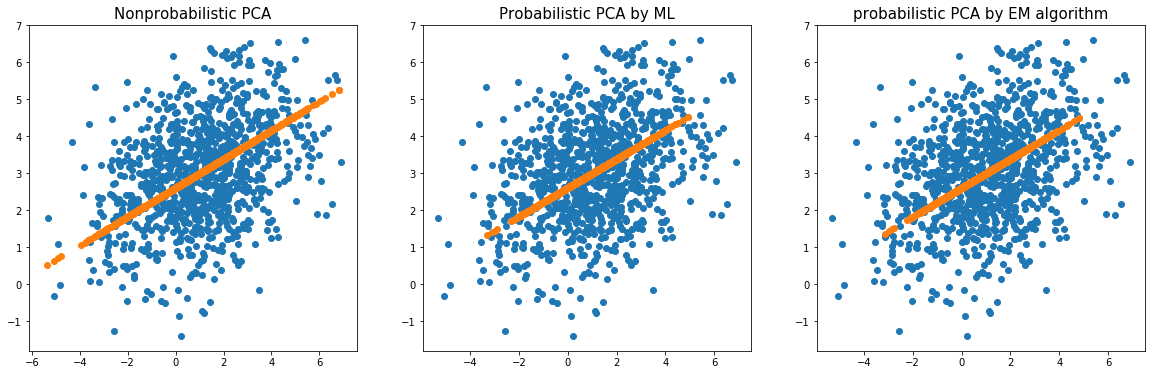

In [3]:
C = np.random.multivariate_normal(MU, SIGMA, NUM_C)
fig, axes = plt.subplots(1, 3, figsize = (20, 6))
C_non = Nonpro_PCA(C, M)
C_ML = Pro_PCA_ML(C, M)
C_EM = Pro_PCA_EM(C, M, 5)

axes[0].scatter(C[:,0], C[:, 1])
axes[0].scatter(C_non[:,0], C_non[:, 1])
axes[0].set_title("Nonprobabilistic PCA", fontsize = 15)
axes[1].scatter(C[:,0], C[:, 1])
axes[1].scatter(C_ML[:,0], C_ML[:, 1])
axes[1].set_title("Probabilistic PCA by ML", fontsize = 15)
axes[2].scatter(C[:,0], C[:, 1])
axes[2].scatter(C_EM[:,0], C_EM[:, 1])
axes[2].set_title("probabilistic PCA by EM algorithm", fontsize = 15)